# Regression Examples
    
<div class ="alert alert-success">
Task 1
    
Load the dataset 'data/regression_example1.csv'. Try to fit a (linear) regression line for the data set (xdata and ydata columns). Evaluate the quality with the R² score and see how good the regressions fits with the test set (xtest and ytest columns). 

</div>

R^2 data: 0.804
R^2 test: -0.161


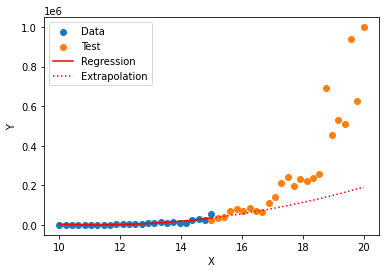

R^2 data: 0.944
R^2 test: 0.937


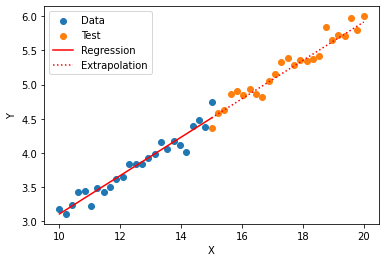

In [16]:
import numpy as num
import matplotlib.pyplot as plt
import pandas as pd


num.random.seed(0)

offset = 100
noise_level = 0.1
xdata = num.linspace(10, 15, 25)
ydata = 2 ** xdata #+ num.random.normal(0, noise_level, len(xdata)) + offset

xtest = num.linspace(15, 20, 25)
ytest = 2 ** xtest #+ num.random.normal(0, noise_level, len(xtest)) + offset

ydata = num.log10(ydata)  + num.random.normal(0, noise_level, len(xdata))
ytest = num.log10(ytest)  + num.random.normal(0, noise_level, len(xdata))

ydata = 10 ** ydata
ytest = 10 ** ytest

df = pd.DataFrame()
df['xdata'] = xdata
df['ydata'] = ydata
df['xtest'] = xtest
df['ytest'] = ytest
# print(df)
# df.to_csv('data/regression_example1.csv')

# df = pd.read_csv('data/regression_example1.csv')
# xdata = df['xdata']
# ydata = df['ydata']
# xtest = df['xtest']
# ytest = df['ytest']

#### Default approach
order = 2
coeff, residuals, _, _, _ = num.polyfit(xdata, ydata, order, full=True)
residuals = residuals[0]

model = num.poly1d(coeff)
yregr = model(xdata)
yregr2 = model(xtest)

denominator = sum((ydata - num.mean(ydata)) ** 2)
r2 = 1 - (residuals / denominator)
print('R^2 data: %.3f' % r2)

residuals = sum((ytest - yregr2) ** 2)
denominator = sum((ytest - num.mean(ytest)) ** 2)
r2_test = 1 - (residuals / denominator)
print('R^2 test: %.3f' % r2_test)

plt.figure()
plt.scatter(xdata, ydata, label='Data')
plt.scatter(xtest, ytest, label='Test')
plt.plot(xdata, yregr, color='red', label='Regression')
plt.plot(xtest, yregr2, color='red', linestyle=':', label='Extrapolation')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


#### Log-approach
ydata = num.log10(ydata)
ytest = num.log10(ytest)

order = 1
coeff, residuals, _, _, _ = num.polyfit(xdata, ydata, order, full=True)
residuals = residuals[0]

model = num.poly1d(coeff)
yregr = model(xdata)
yregr2 = model(xtest)

denominator = sum((ydata - num.mean(ydata)) ** 2)
r2 = 1 - (residuals / denominator)
print('R^2 data: %.3f' % r2)

residuals = sum((ytest - yregr2) ** 2)
denominator = sum((ytest - num.mean(ytest)) ** 2)
r2_test = 1 - (residuals / denominator)
print('R^2 test: %.3f' % r2_test)

plt.figure()
plt.scatter(xdata, ydata, label='Data')
plt.scatter(xtest, ytest, label='Test')
plt.plot(xdata, yregr, color='red', label='Regression')
plt.plot(xtest, yregr2, color='red', linestyle=':', label='Extrapolation')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()